## Imports

In [1]:
import pyearthtools.data

## Variables

In [2]:
doi = '2022-01-01T0100'
var = 'tcwv'
plot_kwargs = {'figsize': (20,10)}

### Problem Space
The global dataset's commonly worked with are quite large, and thus it is useful to cut them to regions of interest

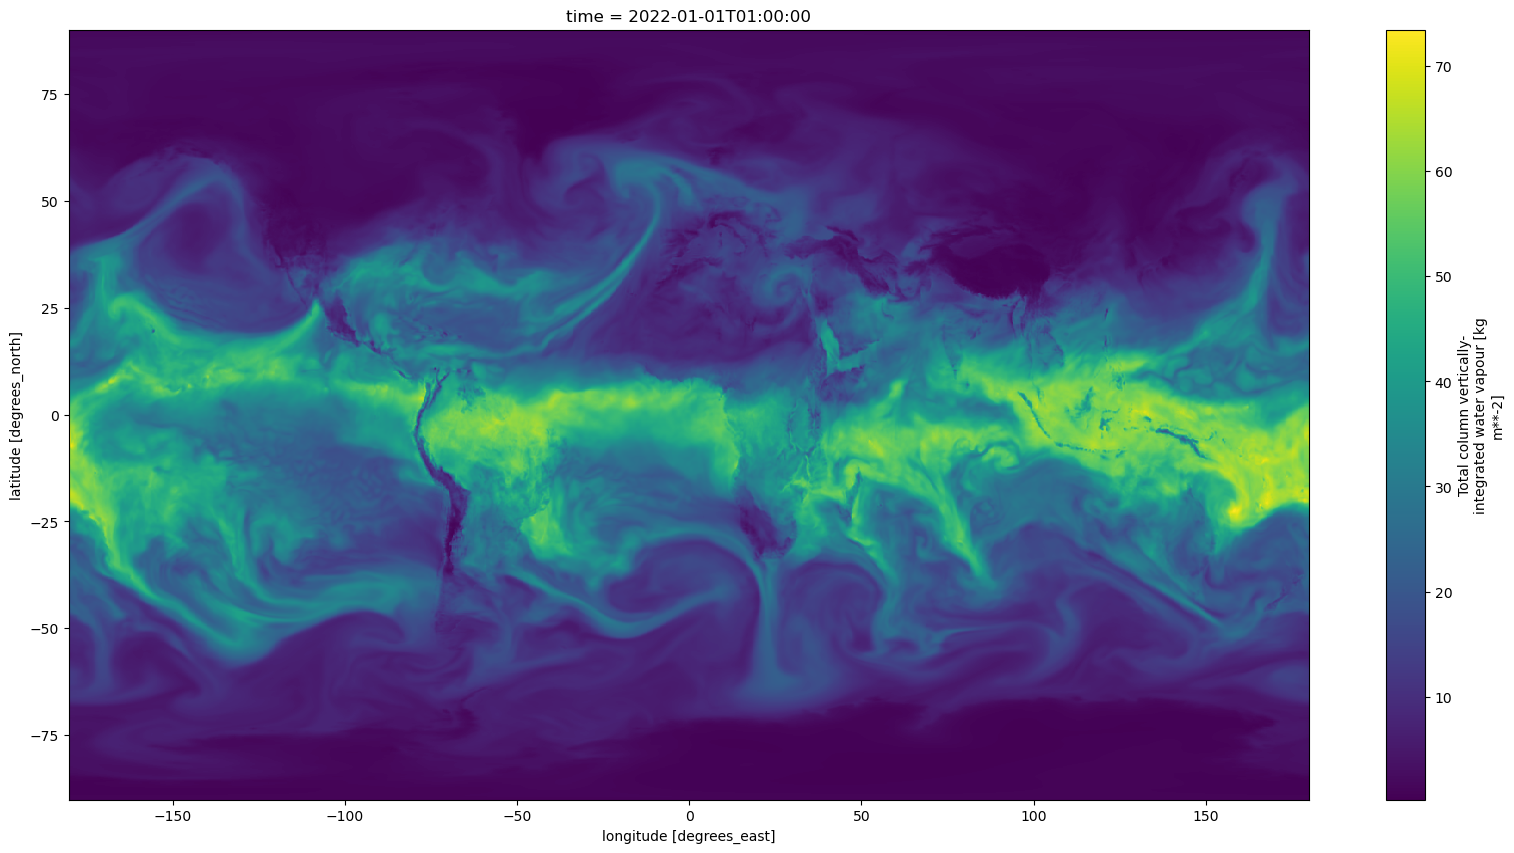

In [3]:
era5 = pyearthtools.data.archive.ERA5(var,level = 'single')
era5(doi)[var].plot(**plot_kwargs)

## Region Transform
`edit.data.transform` provides a region transform to apply common region cutting when retrieving data.

By using this transform, when retrieving multiple timesteps through series, or other indexing, the data will be culled at the earliest opportunity to limit unneccessary operations.

The `region` transform provides a few options, 
 - Bounding Box
 - Reference Dataset
 - Common String Lookup
 - Shapefile
 - Static Shapefile retrieval 

### Examples

#### Bounding Box

In [4]:
bounding_box = pyearthtools.data.transform.region.bounding(-50, -10, 110, 155)
bounding_box

Transform:
   BoundingCut                   Cut Dataset to specified Bounding Box

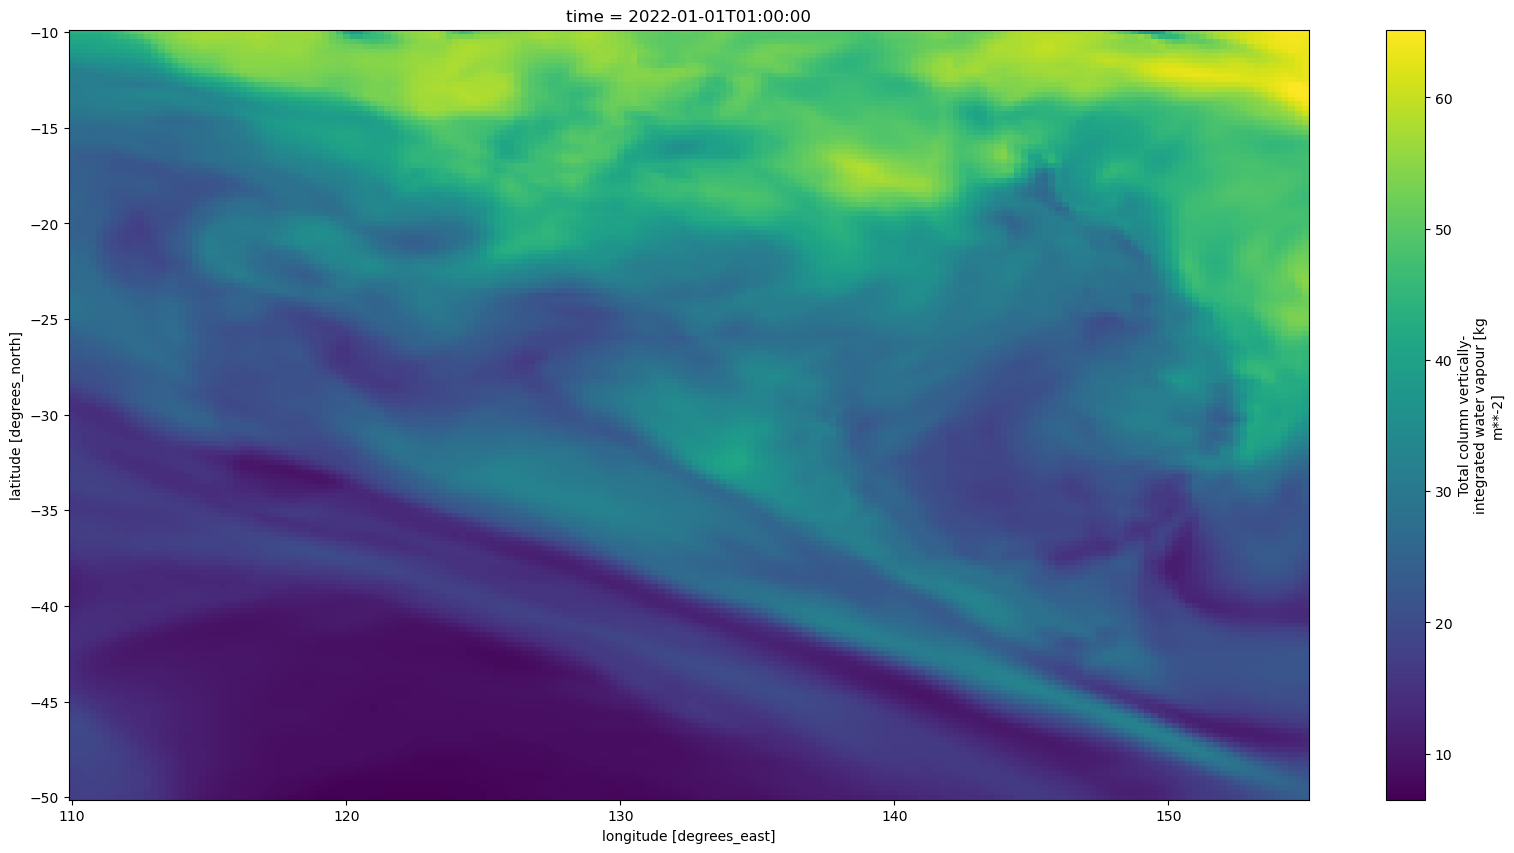

In [5]:
era5(doi, transforms = bounding_box)[var].plot(**plot_kwargs)

#### Like
Cut ERA5 to the Australian Satellite Region

In [6]:
like_dataset = pyearthtools.data.transform.region.like(pyearthtools.data.archive.satellite('cloud_type')(doi))
like_dataset

Transform:
   BoundingCut                   Cut Dataset to specified Bounding Box

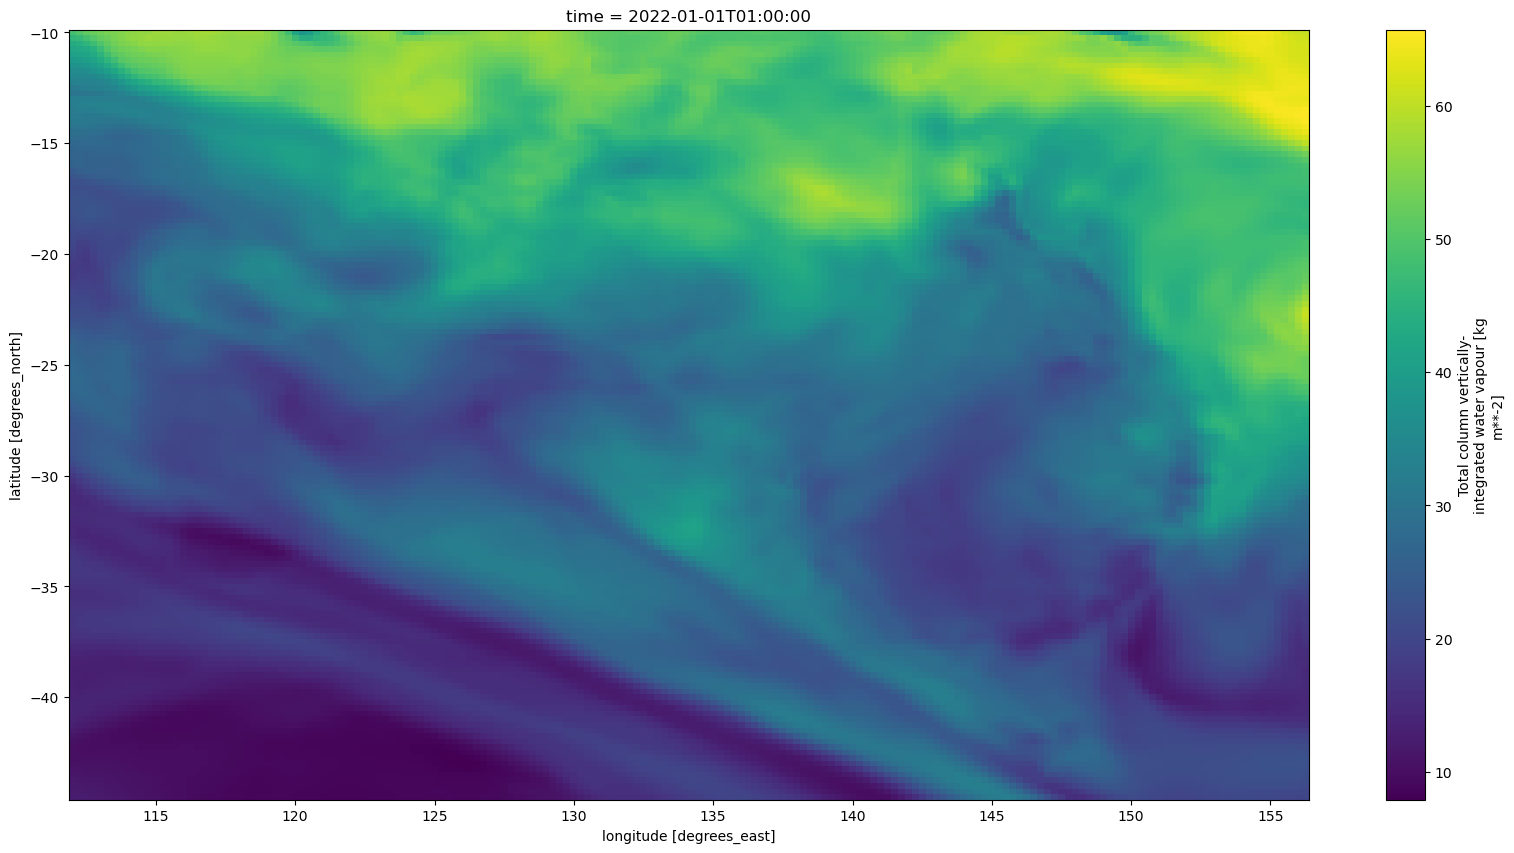

In [7]:
era5(doi, transforms = like_dataset)[var].plot(**plot_kwargs)

#### Lookup
Cut ERA5 to the predefined Australia Region

In [8]:
lookup = pyearthtools.data.transform.region.lookup('Australia')
lookup

Transform:
   BoundingCut                   Cut Dataset to specified Bounding Box

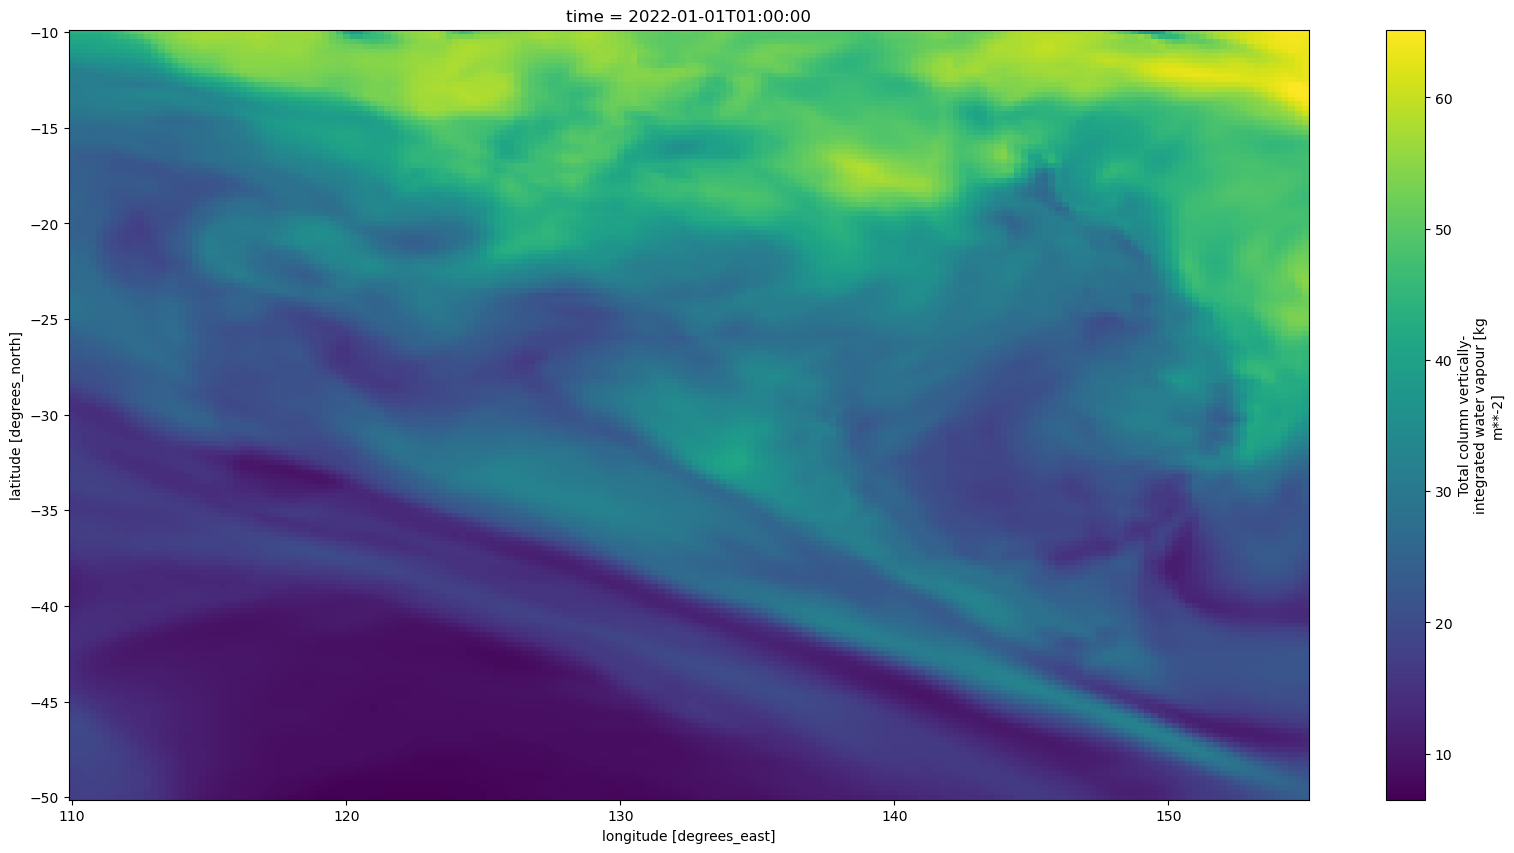

In [9]:
era5(doi, transforms = lookup)[var].plot(**plot_kwargs)

#### from_geosearch
Using a shapefile cut to the Australian Region

In [10]:
shapefile_trim = pyearthtools.data.transform.region.from_geosearch('Australia')
shapefile_trim

Transform:
   ShapeFileCut                  Cut Dataset to shapefile

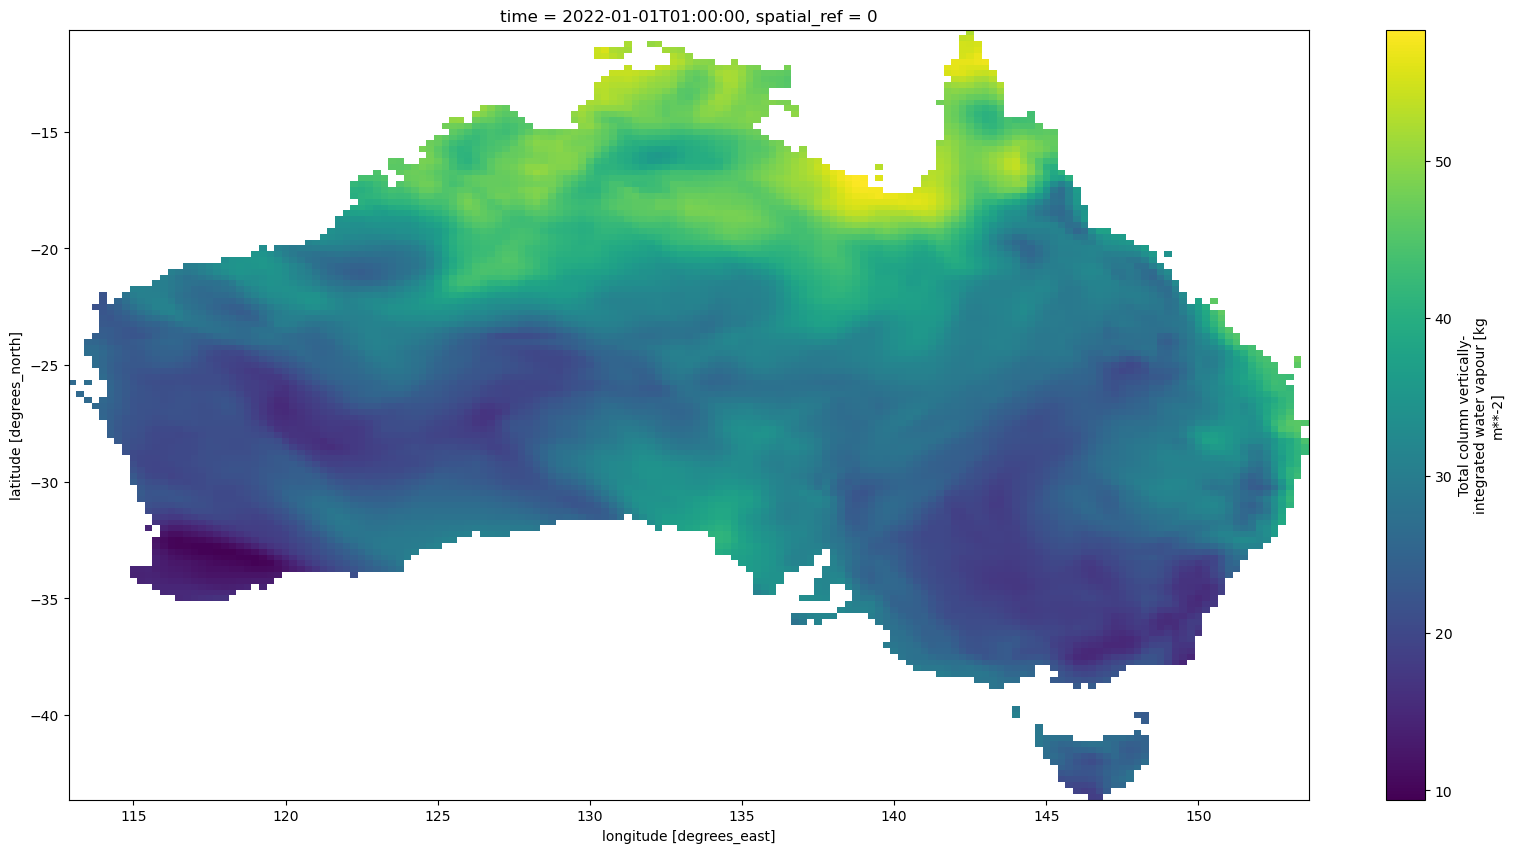

In [11]:
era5(doi, transforms = shapefile_trim)[var].plot(**plot_kwargs)

It is also possible to use the `edit.data.static.geographic` sources to search for shapefiles.

In [12]:
pyearthtools.data.static.geographic()('World').head()

,iso3,status,color_code,name,continent,region,iso_3166_1_,french_shor,geometry
0,None,Adm. by EGY,EGY,Ma'tan al-Sarra,Africa,Northern Africa,None,Ma'tan al-Sarra,"POLYGON ((33.25104 21.99977, 34.15064 21.99603..."
1,CHE,Member State,CHE,Switzerland,Europe,Western Europe,CH,Suisse,"POLYGON ((9.56672 47.54045, 9.55980 47.50209, ..."
2,None,UK Territory,GBR,Jersey,Europe,Northern Europe,None,Jersey,"POLYGON ((-2.01500 49.21417, -2.02111 49.17721..."
3,AUT,Member State,AUT,Austria,Europe,Western Europe,AT,Autriche,"POLYGON ((16.94618 48.61907, 16.94333 48.57333..."
4,PRT,Member State,PRT,Portugal,Europe,Southern Europe,PT,Portugal,"POLYGON ((-7.43185 37.25319, -7.41903 37.18055..."


In [13]:
shapefile_trim = pyearthtools.data.transform.region.from_geosearch('World', column = 'continent', value = 'Americas')
shapefile_trim

Transform:
   ShapeFileCut                  Cut Dataset to shapefile: Americas

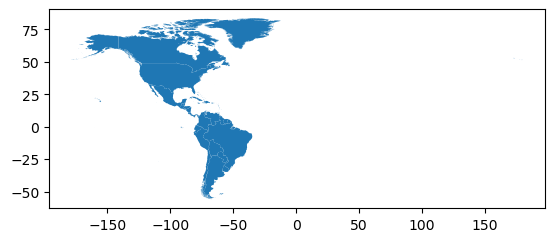

In [14]:
shapefile_trim.plot()

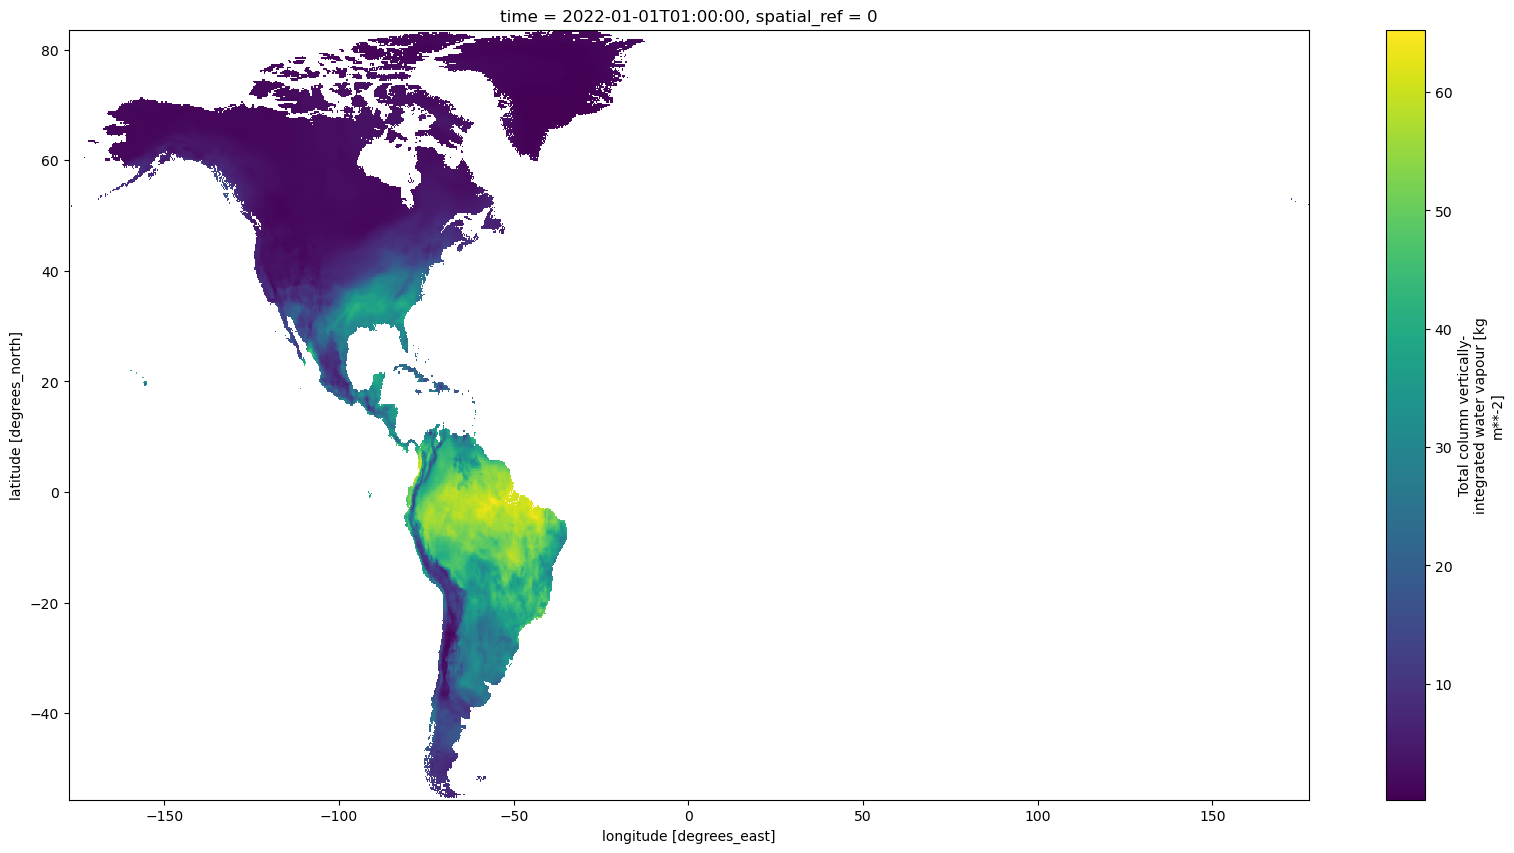

In [15]:
era5(doi, transforms = shapefile_trim)[var].plot(**plot_kwargs)

#### from_shapefile

<AxesSubplot:>

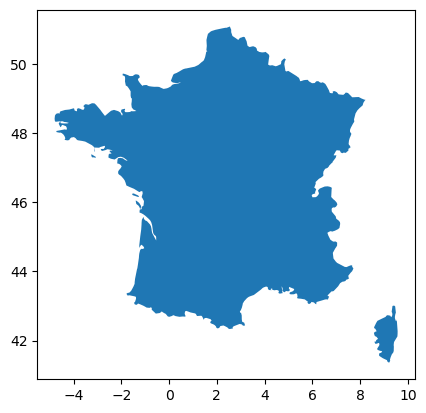

In [16]:
shapefile = pyearthtools.data.static.geographic()('World')
shapefile = shapefile[shapefile.name == 'France']
shapefile.plot()

In [17]:
shapefile_trim = pyearthtools.data.transform.region.from_shapefile(shapefile.geometry)
shapefile_trim

Transform:
   ShapeFileCut                  Cut Dataset to shapefile

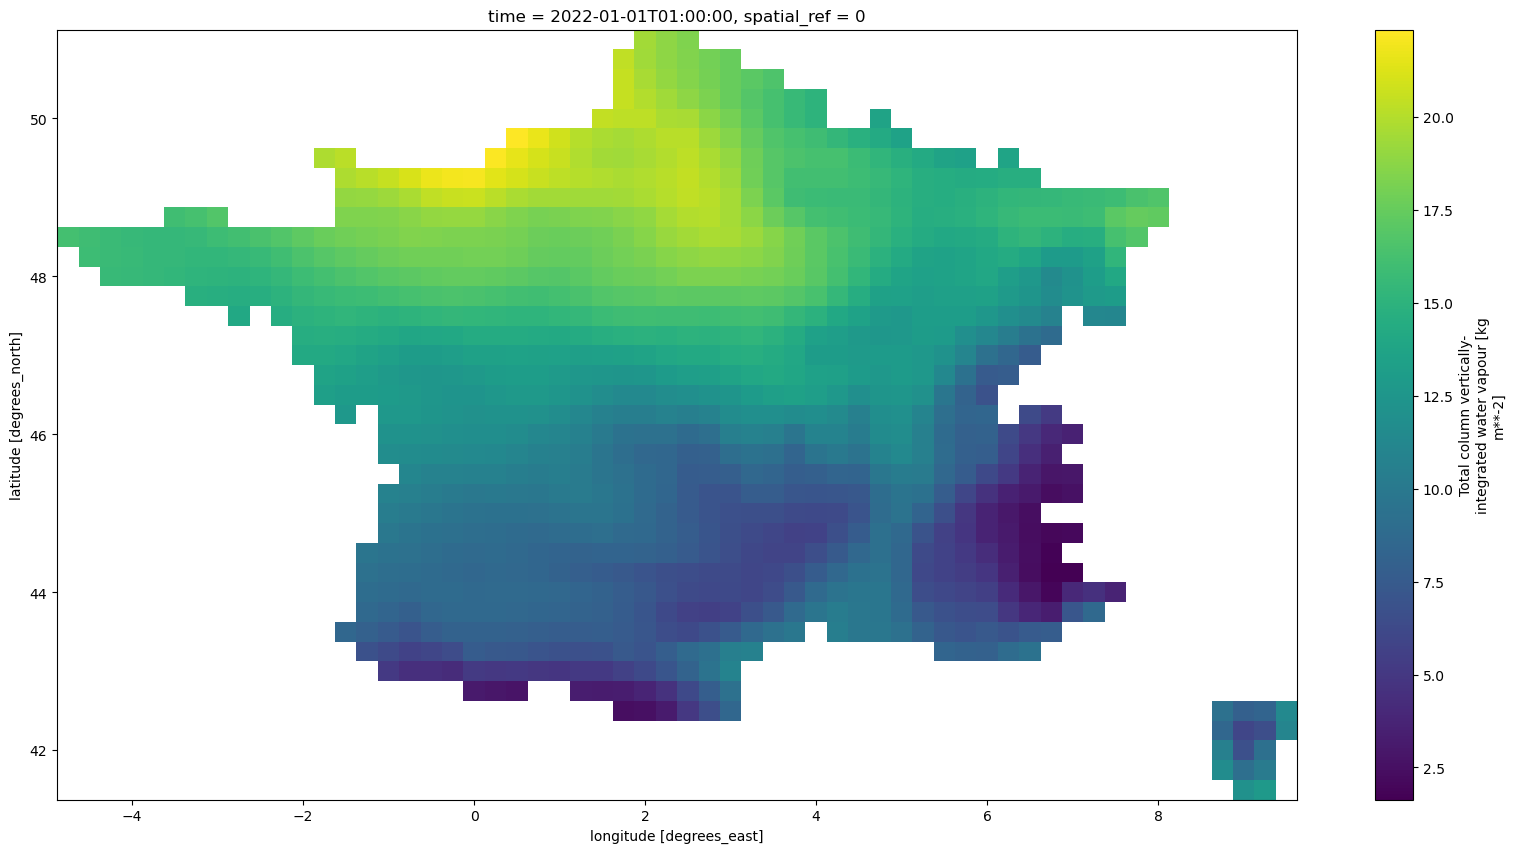

In [18]:
era5(doi, transforms = shapefile_trim)[var].plot(**plot_kwargs)